In [ ]:
# Logistic Regression 로지스틱 회귀 0 ~ 1 이진분류
# https://github.com/rickiepark/hg-mldl/blob/master/4-1.ipynb
# SGD (Stochastic Gradient Descent) SGD는 경사 하강법의 변형으로, 머신러닝 모델의 파라미터를 최적화하기 위해 사용됩니다. 주로 대규모 데이터셋이나 온라인 학습(배치가 아닌 실시간 데이터 학습)에 적합합니다.
# SVM (Support Vector Machine) 초평면: 데이터 클래스를 구분하는 결정 경계입니다 서포트 벡터: 결정 경계를 정의하는데 가장 중요한 데이터 포인트들입니다

In [39]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [41]:
fish = pd.read_csv('http://bit.ly/fish_csv_data')
fish['Species'].unique() # ['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt']
fish.head(2)
fish.columns # ['Species', 'Weight', 'Length', 'Diagonal', 'Height', 'Width']
# fish = fish.loc[(fish['Species']=='Bream') | (fish['Species']=='Smelt')] #Bream, Smelt 두개만 , 이진분류
fish1 = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']]
print(type(fish1))# <class 'pandas.core.frame.DataFrame'>
fish2 = fish1.values
print(type(fish2)) # <class 'numpy.ndarray'>
fish3 = fish['Species'].values
fish['Species'].unique()
X_train, X_test, y_train, y_test = train_test_split(fish2, fish3, random_state=42)
# StandardScaler 객체 생성
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
lr = LogisticRegression()
lr.fit(X_train, y_train)
# print(lr.predict(X_test))
# print(lr.predict_proba(X_test)) # 각클래스에 속할 확률
# y_test
# lr.decision_function(X_test) # 결정함수, 분류할때 얼마나 강하게 결정하였는가

lr_ovr = LogisticRegression(max_iter=200)
lr_ovr.fit(X_train, y_train)

# 다중 클래스 로지스틱 회귀 모델 학습 (Multinomial 방식)
lr_multinomial = LogisticRegression(multi_class='multinomial', max_iter=200, solver='lbfgs') # 소프트맥스 회귀 multinomial
lr_multinomial.fit(X_train, y_train)

# 예측
y_pred_ovr = lr_ovr.predict(X_test)
y_pred_multinomial = lr_multinomial.predict(X_test)

print("One-vs-Rest 방식의 예측:",accuracy_score(y_test, y_pred_ovr), y_pred_ovr)
print("Multinomial 방식의 예측:",accuracy_score(y_test, y_pred_multinomial), y_pred_multinomial)
# print("SGDClassifier Accuracy:", accuracy_score(y_test, y_pred_sgd))

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>
One-vs-Rest 방식의 예측: 0.85 ['Perch' 'Smelt' 'Pike' 'Perch' 'Perch' 'Bream' 'Smelt' 'Perch' 'Perch'
 'Pike' 'Bream' 'Perch' 'Bream' 'Parkki' 'Bream' 'Bream' 'Perch' 'Perch'
 'Perch' 'Bream' 'Smelt' 'Bream' 'Bream' 'Bream' 'Bream' 'Perch' 'Perch'
 'Perch' 'Smelt' 'Smelt' 'Pike' 'Perch' 'Perch' 'Pike' 'Bream' 'Perch'
 'Perch' 'Perch' 'Parkki' 'Perch']
Multinomial 방식의 예측: 0.85 ['Perch' 'Smelt' 'Pike' 'Perch' 'Perch' 'Bream' 'Smelt' 'Perch' 'Perch'
 'Pike' 'Bream' 'Perch' 'Bream' 'Parkki' 'Bream' 'Bream' 'Perch' 'Perch'
 'Perch' 'Bream' 'Smelt' 'Bream' 'Bream' 'Bream' 'Bream' 'Perch' 'Perch'
 'Perch' 'Smelt' 'Smelt' 'Pike' 'Perch' 'Perch' 'Pike' 'Bream' 'Perch'
 'Perch' 'Perch' 'Parkki' 'Perch']


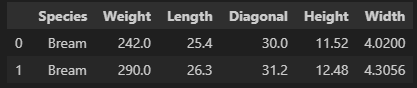

In [24]:
fish = pd.read_csv('http://bit.ly/fish_csv_data')

# fish.info() # object 는 숫자로 바꿔야 한다 머신이에서는 안해도 되네
fish['Species'].unique() # ['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt']
fish.head(2)
fish.columns # ['Species', 'Weight', 'Length', 'Diagonal', 'Height', 'Width']
fish = fish.loc[(fish['Species']=='Bream') | (fish['Species']=='Smelt')]
fish1 = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']]
print(type(fish1))# <class 'pandas.core.frame.DataFrame'>
fish2 = fish1.values
print(type(fish2)) # <class 'numpy.ndarray'>
fish3 = fish['Species'].values
fish['Species'].unique()

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>


array(['Bream', 'Smelt'], dtype=object)

In [33]:
X_train, X_test, y_train, y_test = train_test_split(fish2, fish3, random_state=42)
# StandardScaler 객체 생성
scaler = StandardScaler()
# 모델의 성능 향상: 많은 머신러닝 알고리즘, 특히 경사 하강법을 사용하는 알고리즘(예: 선형 회귀, 로지스틱 회귀, 신경망 등)은 데이터의 스케일에 민감합니다. 
# 피처의 스케일이 다르면 최적의 솔루션으로 수렴하는 속도가 느려지거나, 제대로 수렴하지 않을 수 있습니다.
# 정규화 필요성: KNN, SVM, K-평균과 같은 거리 기반 알고리즘에서는 피처들의 스케일이 다르면 특정 피처가 다른 피처보다 더 큰 영향을 미칠 수 있습니다.

# 데이터 표준화 (fit_transform 메서드 사용)
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
# y_train = scaler.fit_transform(y_train)
# y_test = scaler.fit_transform(y_test)

# print(X_test)
lr = LogisticRegression()
lr.fit(X_train, y_train)
print(lr.predict(X_test))
print(lr.predict_proba(X_test)) # 각클래스에 속할 확률
y_test
lr.decision_function(X_test) # 결정함수, 분류할때 얼마나 강하게 결정하였는가


['Bream' 'Smelt' 'Smelt' 'Smelt' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream'
 'Bream' 'Bream' 'Bream' 'Bream']
[[0.94907744 0.05092256]
 [0.01069346 0.98930654]
 [0.02188471 0.97811529]
 [0.01047612 0.98952388]
 [0.9811643  0.0188357 ]
 [0.9932275  0.0067725 ]
 [0.99286422 0.00713578]
 [0.99296063 0.00703937]
 [0.99807479 0.00192521]
 [0.98357374 0.01642626]
 [0.94029775 0.05970225]
 [0.91674258 0.08325742]
 [0.99863959 0.00136041]]


array([-2.92518437,  4.5273717 ,  3.79983925,  4.54812585, -3.95298567,
       -4.98808948, -4.93547193, -4.94917262, -6.25079442, -4.09231148,
       -2.75682692, -2.39888941, -6.59860535])

In [19]:
help(StandardScaler)

Help on class StandardScaler in module sklearn.preprocessing._data:

class StandardScaler(sklearn.base.OneToOneFeatureMixin, sklearn.base.TransformerMixin, sklearn.base.BaseEstimator)
 |  StandardScaler(*, copy=True, with_mean=True, with_std=True)
 |  
 |  Standardize features by removing the mean and scaling to unit variance.
 |  
 |  The standard score of a sample `x` is calculated as:
 |  
 |      z = (x - u) / s
 |  
 |  where `u` is the mean of the training samples or zero if `with_mean=False`,
 |  and `s` is the standard deviation of the training samples or one if
 |  `with_std=False`.
 |  
 |  Centering and scaling happen independently on each feature by computing
 |  the relevant statistics on the samples in the training set. Mean and
 |  standard deviation are then stored to be used on later data using
 |  :meth:`transform`.
 |  
 |  Standardization of a dataset is a common requirement for many
 |  machine learning estimators: they might behave badly if the
 |  individual feat

In [14]:
help(train_test_split)

Help on function train_test_split in module sklearn.model_selection._split:

train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)
    Split arrays or matrices into random train and test subsets.
    
    Quick utility that wraps input validation,
    ``next(ShuffleSplit().split(X, y))``, and application to input data
    into a single call for splitting (and optionally subsampling) data into a
    one-liner.
    
    Read more in the :ref:`User Guide <cross_validation>`.
    
    Parameters
    ----------
    *arrays : sequence of indexables with same length / shape[0]
        Allowed inputs are lists, numpy arrays, scipy-sparse
        matrices or pandas dataframes.
    
    test_size : float or int, default=None
        If float, should be between 0.0 and 1.0 and represent the proportion
        of the dataset to include in the test split. If int, represents the
        absolute number of test samples. If None, the value is set to